In [1]:
import numpy as np
import pickle
import os
from nupack import *
import matplotlib.pyplot as plt
from tqdm import tqdm

dna_complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}

def revcom(sequence):
    """
    Reverse complements a DNA sequence.
    :param sequence: DNA string, do not add any other characters (TODO: make more robust)
    :return: processed sequence (string)
    """
    return "".join(dna_complement[n] for n in reversed(sequence))


with open(os.path.join('/root', 'core_32_sequences.pkl'), 'rb') as f:
    antihandles, handles = pickle.load(f)
    
# Combining the lists
allhandles = handles 

print(handles)
print(antihandles)    







['GTATCAG', 'CCTAATC', 'CTGAACT', 'CATTTGC', 'CTTATGC', 'GTATGAG', 'TTTAGCC', 'GTAAGAC', 'CGGAAAA', 'TTACACC', 'GTTACAG', 'TTTGACC', 'GTTGCAA', 'GATTTCC', 'GATTGTC', 'GTAGAAG', 'CAAACTC', 'CTTTGAG', 'CCTTACT', 'CGCAAAA', 'GTTTCAC', 'CTTCTGT', 'CTTTTCC', 'GATAACC', 'AAGAGAG', 'CTAGATC', 'GTTTGTC', 'GGAATTC', 'GATGTCG', 'GTGATAG', 'CTTGTGT', 'GTGAATC']
['CTGATAC', 'GATTAGG', 'AGTTCAG', 'GCAAATG', 'GCATAAG', 'CTCATAC', 'GGCTAAA', 'GTCTTAC', 'TTTTCCG', 'GGTGTAA', 'CTGTAAC', 'GGTCAAA', 'TTGCAAC', 'GGAAATC', 'GACAATC', 'CTTCTAC', 'GAGTTTG', 'CTCAAAG', 'AGTAAGG', 'TTTTGCG', 'GTGAAAC', 'ACAGAAG', 'GGAAAAG', 'GGTTATC', 'CTCTCTT', 'GATCTAG', 'GACAAAC', 'GAATTCC', 'CGACATC', 'CTATCAC', 'ACACAAG', 'GATTCAC']


In [2]:
def nupack_compute_mfe(seq1, seq2):
    A = Strand(seq1, name='H1')  # name is required for strands
    B = Strand(seq2, name='H2')
    # specify tubes
    t1 = Tube(strands={A: 1e-8, B: 1e-8}, complexes=SetSpec(max_size=2), name='t1')
    # analyze tubes
    model1 = Model(material='dna', celsius=37, sodium=0.05, magnesium=0.025)
    tube_results = tube_analysis(tubes=[t1], model=model1, compute=['pairs', 'mfe', 'sample'],
                                 options={'num_sample': 500})
    #print(tube_results)
    energy = tube_results['(H1+H2)'].mfe[0].energy
    #print(energy)
    return energy
#print (allhandles[0])
#print (allhandles[1])
test = nupack_compute_mfe(allhandles[0],allhandles[1])
print(test)

-3.739487648010254


[-6.99526262 -6.94526339 -7.76526308 -8.0852623  -7.49526262 -6.99526358
 -7.95526266 -7.10526323 -8.32526302 -7.76526308 -7.25526285 -8.04526234
 -8.59526253 -7.38526297 -7.43526316 -6.94526339 -7.53526258 -7.37526369
 -7.43526316 -8.87526226 -7.69526291 -7.7652626  -7.48526239 -7.10526323
 -7.45526361 -6.68526316 -7.69526339 -7.38526297 -8.6052618  -6.99526262
 -8.07526302 -7.43526316]
[[-6.99526262 -6.94526339 -7.76526308 ... -6.99526262 -8.07526302
  -7.43526316]
 [-6.99526262 -6.94526339 -7.76526308 ... -6.99526262 -8.07526302
  -7.43526316]
 [-6.99526262 -6.94526339 -7.76526308 ... -6.99526262 -8.07526302
  -7.43526316]
 ...
 [-6.99526262 -6.94526339 -7.76526308 ... -6.99526262 -8.07526302
  -7.43526316]
 [-6.99526262 -6.94526339 -7.76526308 ... -6.99526262 -8.07526302
  -7.43526316]
 [-6.99526262 -6.94526339 -7.76526308 ... -6.99526262 -8.07526302
  -7.43526316]]


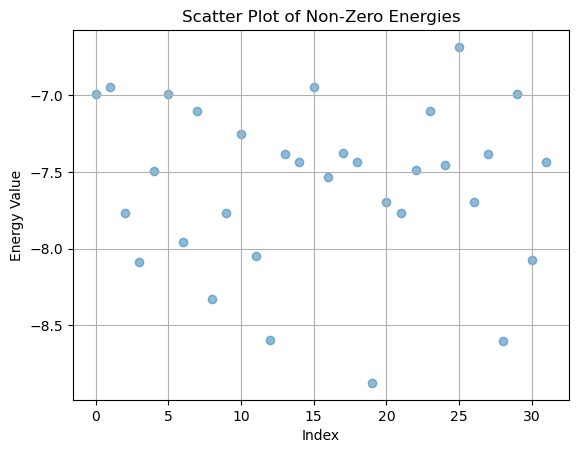

In [10]:
matching_handle_antihandle_energies = np.zeros(len(handles))
for i in range((len(handles))):
    #print(i)
    matching_handle_antihandle_energies[i] = nupack_compute_mfe(handles[i], antihandles[i])


tiled_handle_matching_handle_antihandle_energies =  np.tile(matching_handle_antihandle_energies, (len(handles), 1))

print(matching_handle_antihandle_energies)
print(tiled_handle_matching_handle_antihandle_energies)

x_data2 = np.arange(len(matching_handle_antihandle_energies))

plt.scatter(x_data2, matching_handle_antihandle_energies, alpha=0.5)  # alpha is set to 0.5 for better visibility of point overlap
plt.title('Scatter Plot of Non-Zero Energies')
plt.xlabel('Index')
plt.ylabel('Energy Value')
plt.grid(True)
plt.show()

In [26]:
crosscorrelated_energies = np.zeros((len(allhandles), len(allhandles)))

crosscorrelated_handle_handle_energies= np.zeros((len(handles), len(handles)))
for i, handle_i in enumerate(tqdm(handles)):
    #print(handle_i)
    for j, handle_j in enumerate(handles):

        if j != i: # usually one uses j<i to avoid double and self interaction counts 
            #print(handle_j)
            test = nupack_compute_mfe(handle_i, handle_j)
            #print(test)
            crosscorrelated_handle_handle_energies[i, j] = test


normalized_crosscorrelated_handle_handle_energies = crosscorrelated_handle_handle_energies/tiled_handle_matching_handle_antihandle_energies
print(crosscorrelated_handle_handle_energies)
#print(normalized_crosscorrelated_handle_handle_energies )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [03:39<00:00,  6.86s/it]

[[ 0.         -3.73948765 -5.45313406 ... -5.81154728 -4.10511541
  -4.61992741]
 [-3.73948765  0.         -3.7783339  ... -4.70125532 -3.6926167
  -3.7783339 ]
 [-5.45313406 -3.7783339   0.         ... -4.11565113 -4.77924967
  -4.11565113]
 ...
 [-5.81154728 -4.70125532 -4.11565113 ...  0.         -3.08224249
  -4.70125532]
 [-4.10511541 -3.6926167  -4.77924967 ... -3.08224249  0.
  -3.0378449 ]
 [-4.61992741 -3.7783339  -4.11565113 ... -4.70125532 -3.0378449
   0.        ]]


In [29]:
crosscorrelated_handle_antihandle_energies= np.zeros((len(handles), len(antihandles)))
for i, handle_i in enumerate(tqdm(handles)):
    #print(handle_i)
    for j, antihandle_j in enumerate(antihandles):

        if j != i: # avoid here the correct binding partners
            #print(handle_j)
            test = nupack_compute_mfe(handle_i, antihandle_j)
            #print(test)
            crosscorrelated_handle_antihandle_energies[i, j] = test



normalized_crosscorrelated_handle_antihandle_energies = crosscorrelated_handle_handle_energies/tiled_handle_matching_handle_antihandle_energies

print(crosscorrelated_handle_antihandle_energies)

 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 22/32 [02:38<01:12,  7.20s/it]


IndexError: list index out of range

[-3.73948765 -5.45313406 -3.83404279 -4.17844868 -5.28775883 -3.53115678
 -4.41105127 -4.5838809  -4.33049822 -4.33049822 -4.91115856 -4.03126431
 -4.88307953 -4.88307953 -4.59820127 -3.96069503 -5.0404129  -4.10642338
 -3.08209395 -3.15899825 -5.24299049 -2.87530684 -5.00677109 -4.54030561
 -5.60652065 -4.10511541 -4.5838809  -5.0205493  -5.81154728 -4.10511541
 -4.61992741 -3.73948765 -3.7783339  -4.77031612 -4.03272009 -3.87926364
 -5.20465088 -4.8456502  -4.62969732 -3.24155641 -3.73948765 -3.7783339
 -3.48812914 -4.85478878 -4.99225855 -4.99137878 -2.82732201 -3.87926364
 -3.67883849 -3.10182643 -3.5374825  -3.36009812 -3.59709167 -3.89647889
 -4.92421913 -4.99137878 -3.73456144 -4.77191401 -3.9102571  -4.70125532
 -3.6926167  -3.7783339  -5.45313406 -3.7783339  -3.26191926 -3.62356448
 -4.11565113 -4.12381411 -4.47017288 -4.0796051  -4.33972597 -5.17293215
 -4.11565113 -4.98931503 -4.75863028 -4.58217049 -4.61590147 -4.11565113
 -4.11565113 -4.11565113 -4.64310741 -4.85184479 -4.

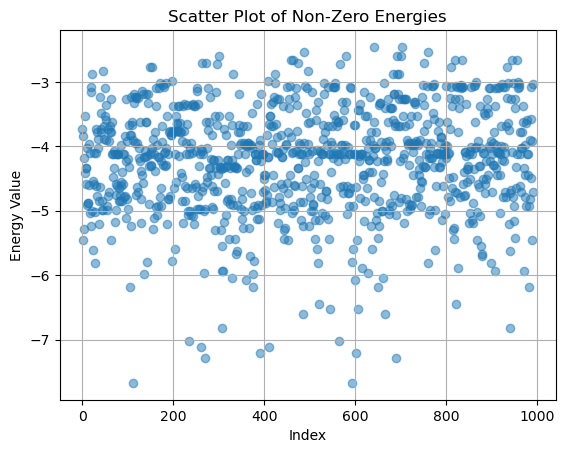

In [25]:
forplothh = crosscorrelated_handle_handle_energies.flatten()
forplothh =  forplothh[forplothh != 0.0]
x_data = np.arange(len(forplothh))
print(forplothh)

plt.scatter(x_data, forplothh, alpha=0.5)  # alpha is set to 0.5 for better visibility of point overlap
plt.title('Scatter Plot of Non-Zero Energies')
plt.xlabel('Index')
plt.ylabel('Energy Value')
plt.grid(True)
plt.show()

[-3.73948765 -5.45313406 -3.83404279 -4.17844868 -5.28775883 -3.53115678
 -4.41105127 -4.5838809  -4.33049822 -4.33049822 -4.91115856 -4.03126431
 -4.88307953 -4.88307953 -4.59820127 -3.96069503 -5.0404129  -4.10642338
 -3.08209395 -3.15899825 -5.24299049 -2.87530684 -5.00677109 -4.54030561
 -5.60652065 -4.10511541 -4.5838809  -5.0205493  -5.81154728 -4.10511541
 -4.61992741 -3.73948765 -3.7783339  -4.77031612 -4.03272009 -3.87926364
 -5.20465088 -4.8456502  -4.62969732 -3.24155641 -3.73948765 -3.7783339
 -3.48812914 -4.85478878 -4.99225855 -4.99137878 -2.82732201 -3.87926364
 -3.67883849 -3.10182643 -3.5374825  -3.36009812 -3.59709167 -3.89647889
 -4.92421913 -4.99137878 -3.73456144 -4.77191401 -3.9102571  -4.70125532
 -3.6926167  -3.7783339  -5.45313406 -3.7783339  -3.26191926 -3.62356448
 -4.11565113 -4.12381411 -4.47017288 -4.0796051  -4.33972597 -5.17293215
 -4.11565113 -4.98931503 -4.75863028 -4.58217049 -4.61590147 -4.11565113
 -4.11565113 -4.11565113 -4.64310741 -4.85184479 -4.

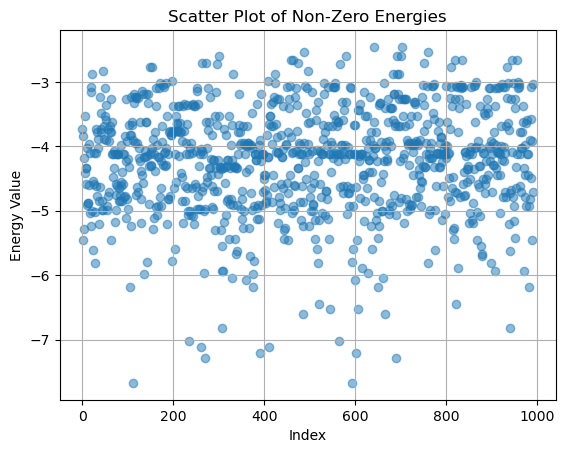

In [28]:
forplothah = crosscorrelated_handle_handle_energies.flatten()
forplothah =  forplothah[forplothah != 0.0]
x_data = np.arange(len(forplothah))
print(forplothah)

plt.scatter(x_data, forplothah, alpha=0.5)  # alpha is set to 0.5 for better visibility of point overlap
plt.title('Scatter Plot of Non-Zero Energies')
plt.xlabel('Index')
plt.ylabel('Energy Value')
plt.grid(True)
plt.show()

In [24]:
bad_boys= np.where(crosscorrelated_handle_handle_energies < -7)
for row, col in zip(*bad_boys): 

    print(row)
    print(col)
    print(handles[row])
    print(revcom(handles[col]))
    print(' ')
    

3
19
CATTTGC
TTTTGCG
 
7
18
GTAAGAC
AGTAAGG
 
8
13
CGGAAAA
GGAAATC
 
8
22
CGGAAAA
GGAAAAG
 
12
19
GTTGCAA
TTTTGCG
 
13
8
GATTTCC
TTTTCCG
 
18
7
CCTTACT
GTCTTAC
 
19
3
CGCAAAA
GCAAATG
 
19
12
CGCAAAA
TTGCAAC
 
22
8
CTTTTCC
TTTTCCG
 
